In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

hrO2 = pd.read_csv("results.csv")
hrO2

,HRvalue,ts,HRvalid,SpO2valid,SpO2value
0,115,1649108316694,True,True,96.727986
1,115,1649108451425,True,True,99.135144
2,65,1649108161222,True,False,'-999
3,65,1649108410058,True,True,95.70606599999999
4,166,1649108244071,True,True,99.24465
5,100,1649108347984,True,False,'-999
6,100,1649108389374,True,True,98.500104
7,100,1649108482492,True,True,98.794776
8,100,1649108503221,True,True,96.727986
9,100,1649108524051,True,False,'-999


In [135]:
hrO2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   HRvalue    43 non-null     object
 1   ts         43 non-null     int64 
 2   HRvalid    43 non-null     bool  
 3   SpO2valid  43 non-null     bool  
 4   SpO2value  43 non-null     object
dtypes: bool(2), int64(1), object(2)
memory usage: 1.2+ KB


## Step 1: Find out non-valid data in the data set

In [32]:
# Even though hr.info says every column is "non-null" but 
# the HRValue and SpO2value columns have some non-numbers.
# The data type for both are "object"!!

# How many valid data in both columns? 
# We can check the HRvalid and SpO2valid columns.

print ('There are',hrO2['HRvalid'].sum(), 'valid data')
print ('There are',hrO2['SpO2valid'].sum(), 'valid data')

There are 42 valid data
There are 33 valid data


### Use String method str.isnumeric() to find non-numerical values. However, it does not work all the time.....

In [33]:
# Without the HRvalid and SpO2valid columns, we need to check the
# data directly using pd.Series.str.isnumeric() 

hrO2['HRvalue'].str.isnumeric().sum()

42

In [34]:
# However, this does not work with SpO2value. It appears the entire column
# data are cast as a Python object
hrO2['SpO2value'].str.isnumeric().sum()

0

### Use the pd.to_numeric() method with an option errors='coerce' to cast the column to float64 and set the non-numerical values to NaN

In [32]:
hr_1 = pd.to_numeric(hrO2['HRvalue'], errors='coerce')
hr_1

0     115.0
1     115.0
2      65.0
3      65.0
4     166.0
5     100.0
6     100.0
7     100.0
8     100.0
9     100.0
10    100.0
11    150.0
12    150.0
13     93.0
14      NaN
15    136.0
16    136.0
17     46.0
18     71.0
19    214.0
20     88.0
21     88.0
22     88.0
23     88.0
24     88.0
25    125.0
26    125.0
27    125.0
28    125.0
29    125.0
30     78.0
31     78.0
32     78.0
33     78.0
34    107.0
35    107.0
36    107.0
37    107.0
38    107.0
39    107.0
40     68.0
41     83.0
42     60.0
Name: HRvalue, dtype: float64

In [39]:
# The row index with NaN is removed
hr_1.dropna(inplace=True)      # inplace=True will change hr_1 
hr_1

0     115.0
1     115.0
2      65.0
3      65.0
4     166.0
5     100.0
6     100.0
7     100.0
8     100.0
9     100.0
10    100.0
11    150.0
12    150.0
13     93.0
15    136.0
16    136.0
17     46.0
18     71.0
19    214.0
20     88.0
21     88.0
22     88.0
23     88.0
24     88.0
25    125.0
26    125.0
27    125.0
28    125.0
29    125.0
30     78.0
31     78.0
32     78.0
33     78.0
34    107.0
35    107.0
36    107.0
37    107.0
38    107.0
39    107.0
40     68.0
41     83.0
42     60.0
Name: HRvalue, dtype: float64

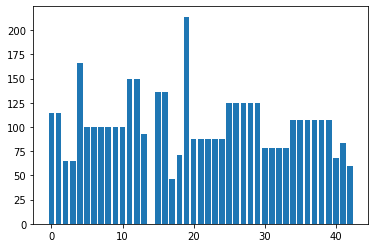

In [41]:
# Plot the bar chart
plt.bar(hr_1.index, hr_1)
plt.show()

### It looks good, but, did you notice there is one missing data at index 14? We need to reset the index to remove the missing indices

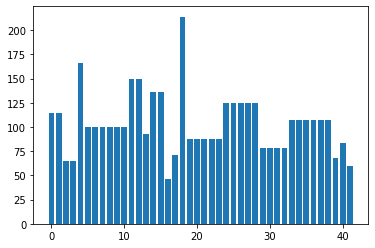

In [47]:
hr_1.reset_index(drop=True, inplace=True)    # drop=True will remove the old index
hr_1
plt.bar(hr_1.index, hr_1)
plt.show()

In [65]:
O2_1 = pd.to_numeric(hrO2['SpO2value'], errors='coerce')
O2_1

0     96.727986
1     99.135144
2           NaN
3     95.706066
4     99.244650
5           NaN
6     98.500104
7     98.794776
8     96.727986
9           NaN
10    99.657000
11    99.712434
12          NaN
13     0.286536
14          NaN
15    99.796266
16    98.169384
17    99.542250
18    96.235050
19          NaN
20          NaN
21    96.235050
22    96.960936
23    96.235050
24          NaN
25    98.752554
26    99.135144
27    96.235050
28    93.124776
29    99.727416
30    98.651946
31    96.727986
32    99.275976
33    97.399800
34    77.996466
35          NaN
36    98.607000
37    95.975064
38          NaN
39    97.802616
40    97.605714
41    98.169384
42    98.452434
Name: SpO2value, dtype: float64

In [72]:
O2_1.dropna(inplace=True)
O2_1.reset_index(drop=True, inplace=True)
O2_1

0     96.727986
1     99.135144
2     95.706066
3     99.244650
4     98.500104
5     98.794776
6     96.727986
7     99.657000
8     99.712434
9      0.286536
10    99.796266
11    98.169384
12    99.542250
13    96.235050
14    96.235050
15    96.960936
16    96.235050
17    98.752554
18    99.135144
19    96.235050
20    93.124776
21    99.727416
22    98.651946
23    96.727986
24    99.275976
25    97.399800
26    77.996466
27    98.607000
28    95.975064
29    97.802616
30    97.605714
31    98.169384
32    98.452434
Name: SpO2value, dtype: float64

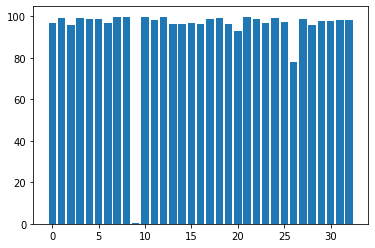

In [73]:
plt.bar(O2_1.index, O2_1)
plt.show()

## Step 2: Find the outliers: data seem to be out of normal range of the variable

In [75]:
# Examining the values of HRvalue (hr_1)
hr_1.describe()

count     42.000000
mean     103.619048
std       31.269055
min       46.000000
25%       84.250000
50%      100.000000
75%      122.500000
max      214.000000
Name: HRvalue, dtype: float64

In [78]:
hr_1.value_counts()

100.0    6
107.0    6
125.0    5
88.0     5
78.0     4
136.0    2
65.0     2
115.0    2
150.0    2
166.0    1
214.0    1
71.0     1
46.0     1
60.0     1
68.0     1
93.0     1
83.0     1
Name: HRvalue, dtype: int64

In [79]:
O2_1.describe()

count    33.000000
mean     94.282000
std      17.290252
min       0.286536
25%      96.235050
50%      98.169384
75%      99.135144
max      99.796266
Name: SpO2value, dtype: float64

### A powerful visual is to use boxplot

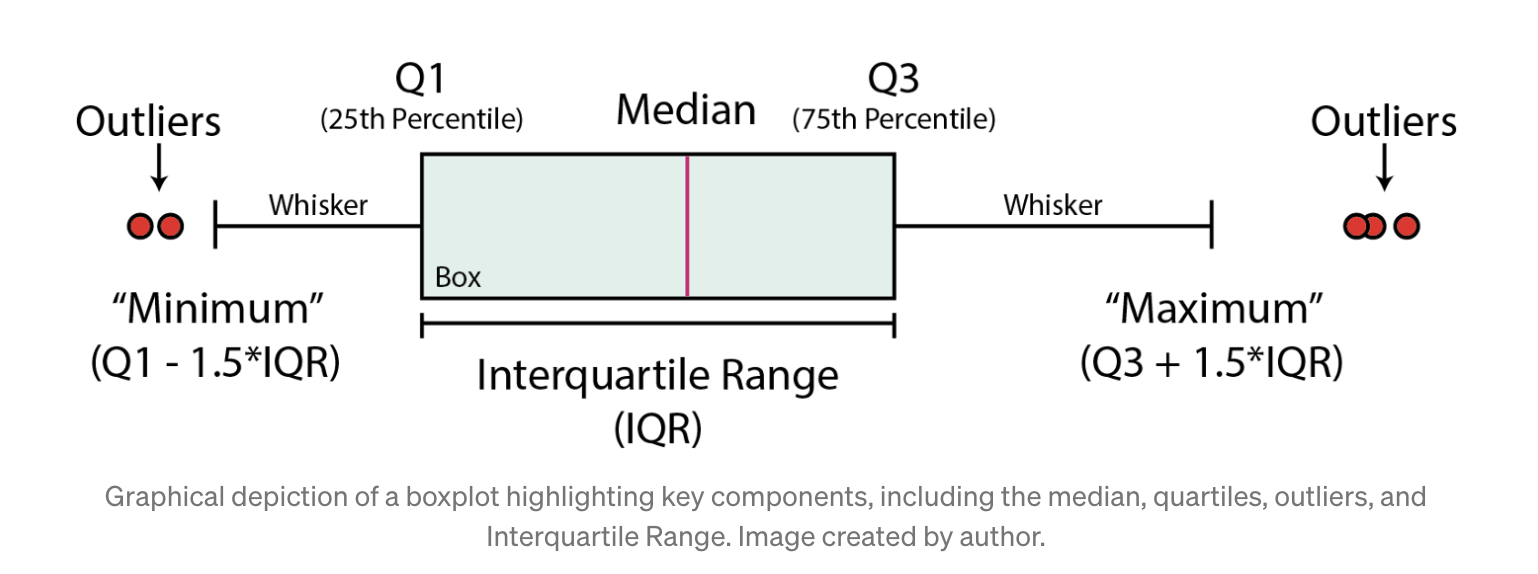

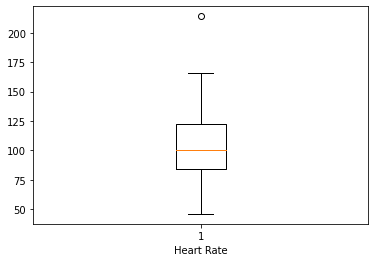

In [102]:
plt.boxplot(hr_1)
plt.xlabel('Heart Rate')
plt.show()

### We can use Seaborn.boxplot as well

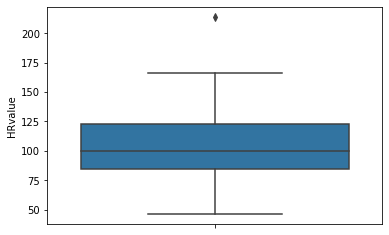

In [107]:
import seaborn as sns

sns.boxplot(y=hr_1)  ## you can try x=hr_1 and see the difference
plt.show()

### Historgram is another good chart to visualize the data distribution

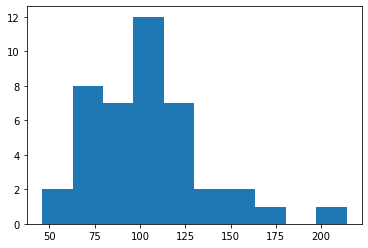

In [119]:
plt.hist(hr_1)
plt.show()

### Heart rate over 150 while sitting is obviously unreal. Dropping from 100 to 50 in a short period of time does not make sense, either. 
### There are different ways to deal with outliers. 
### a. Remove it. or b. Replace it some other reasonable value

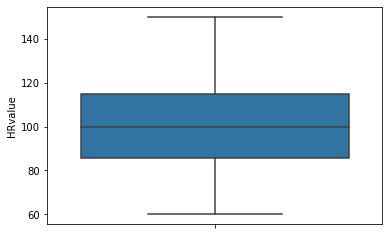

In [145]:
# For discussion purpose,let's consider HR > 150 and HR < 50 as outliers
# a. Remove the outliers

hr_2 = hr_1[(hr_1 <= 150) & (hr_1 >=50)]
sns.boxplot(y=hr_2)
plt.show()

In [162]:
# b. Replace the values with, say, the median value of the dataset

median = hr_1.median()
hr_1[hr_1 > 150] = median
hr_1[hr_1 < 50] = median
hr_1.describe()

100.0


count     42.000000
mean     102.047619
std       21.793882
min       60.000000
25%       94.750000
50%      100.000000
75%      113.000000
max      150.000000
Name: HRvalue, dtype: float64

<AxesSubplot:ylabel='HRvalue'>

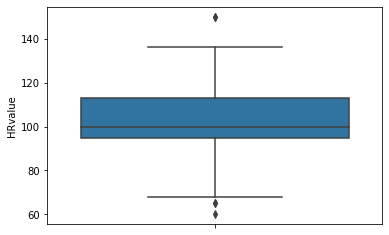

In [159]:
sns.boxplot(y=hr_1)

In [164]:
O2_1.describe()

count    33.000000
mean     94.282000
std      17.290252
min       0.286536
25%      96.235050
50%      98.169384
75%      99.135144
max      99.796266
Name: SpO2value, dtype: float64

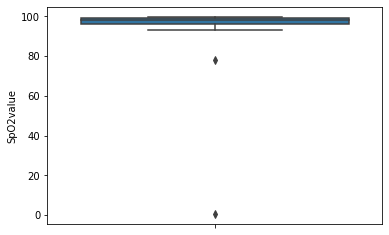

In [167]:
sns.boxplot(y=O2_1)
plt.show()

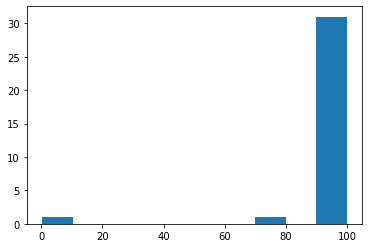

In [169]:
plt.hist(O2_1)
plt.show()

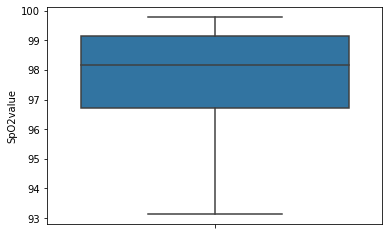

In [179]:
# Remove O2 value less than 0.80
O2_2 = O2_1[O2_1 > 80]
sns.boxplot(y=O2_2)
plt.show()

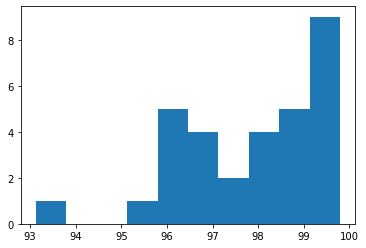

In [182]:
plt.hist(O2_2, bins=10)
plt.show()